In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys, os
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', cmap='Blues')
from slmsuite.holography.algorithms import Hologram
from slmsuite.hardware.slms.slm import SLM
from slmsuite.hardware.cameras.camera import Camera
from slmsuite.hardware.cameraslms import FourierSLM
from slmsuite.holography.algorithms import SpotHologram
import copy

cupy not installed. Using numpy.


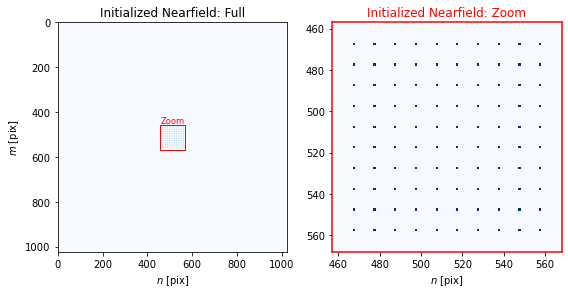

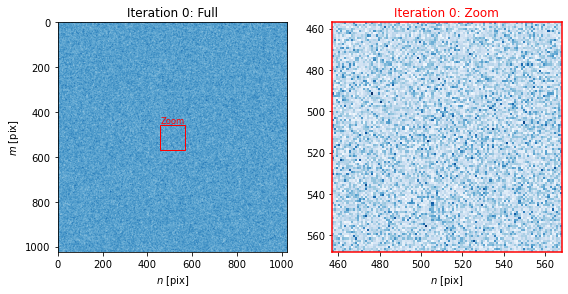

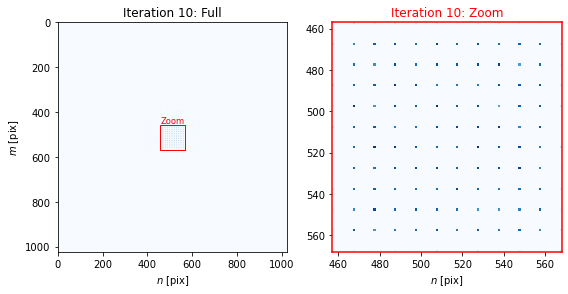

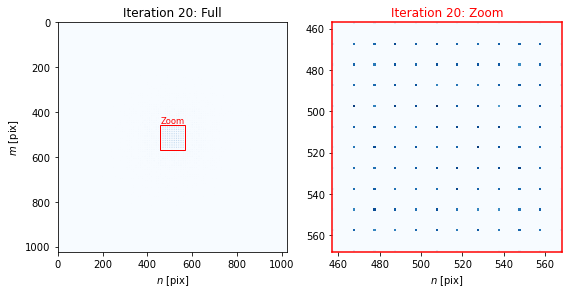

In [2]:
# Move to a larger grid size
slm_size = (1024, 1024)

# Instead of picking a few points, make a rectangular grid in the knm basis
array_holo = SpotHologram.make_rectangular_array(
    slm_size,
    array_shape=(10,10),
    array_pitch=(10,10),
    basis='knm'
)
zoom = array_holo.plot_farfield(source=array_holo.target, title='Initialized Nearfield')
# Example callback function: plot the FF every 10 iterations
def plot_ff(holo): 
    if holo.iter % 10 == 0:
        holo.plot_farfield(limits=zoom, title='Iteration %d'%array_holo.iter)

# Now we'll run the computation using 21 iterations of GS.
array_holo.optimize(method="GS", maxiter=21, callback=plot_ff,
                    stat_groups=['computational_spot'], verbose=False)

100%|██████████| 21/21 [00:06<00:00,  3.13it/s]


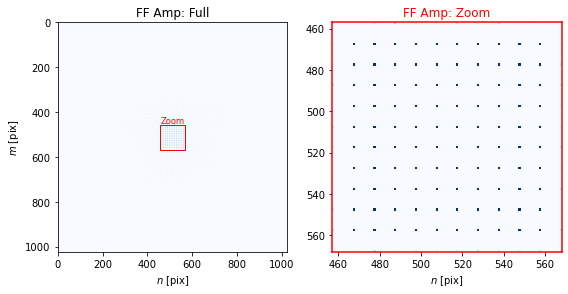

In [3]:
wgs_holo = copy.copy(array_holo)
wgs_holo.reset()
wgs_holo.optimize(method="WGS-Kim", maxiter=21, stat_groups=['computational_spot'])
wgs_holo.plot_farfield(limits=zoom);